In [33]:
import pandas as pd
import os
#limit of pandas display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)



results_dir = '../results/preprocessed_data/task2/'

df_train =  pd.read_csv(os.path.join(results_dir, 'df_train.csv'))[["filepath","filename","ID"]]
df_test = pd.read_csv(os.path.join(results_dir, 'df_test.csv'))[["filepath","filename","ID"]]
df_train_target2a = pd.read_csv(os.path.join(results_dir, 'df_train_target2a.csv'))[["filepath","filename","ID","source"]]
df_train_target2b = pd.read_csv(os.path.join(results_dir, 'df_train_target2b.csv'))[["filepath","filename","ID","source"]]
df_extra_data = pd.read_csv(os.path.join(results_dir, 'df_extra_data.csv'))[["filepath","filename","ID","source"]]

# ✅ Mostrar formas
print("✅ Shapes:")
print("df_train         :", df_train.shape)
print("df_test          :", df_test.shape)
print("df_target2a (hipp):", df_train_target2a.shape)
print("df_target2b (baga):", df_train_target2b.shape)
print("df_extra_data    :", df_extra_data.shape)


✅ Shapes:
df_train         : (79, 3)
df_test          : (12, 3)
df_target2a (hipp): (79, 4)
df_target2b (baga): (79, 4)
df_extra_data    : (237, 4)


In [34]:
df_extra_data.head(2)

,filepath,filename,ID,source
0,/data/cristian/projects/med_data/rise-miccai/task-2/954/155887954/LISA_1016_LF_hipp.nii.gz,LISA_1016_LF_hipp.nii.gz,LISA_1016,LF_hipp
1,/data/cristian/projects/med_data/rise-miccai/task-2/931/155887931/LISA_0055_LF_hipp.nii.gz,LISA_0055_LF_hipp.nii.gz,LISA_0055,LF_hipp


In [35]:
df_extra_data["source"].value_counts()

source
LF_hipp      79
LF_baga      79
ventricle    79
Name: count, dtype: int64

In [36]:
df_extra_data.head(2)

,filepath,filename,ID,source
0,/data/cristian/projects/med_data/rise-miccai/task-2/954/155887954/LISA_1016_LF_hipp.nii.gz,LISA_1016_LF_hipp.nii.gz,LISA_1016,LF_hipp
1,/data/cristian/projects/med_data/rise-miccai/task-2/931/155887931/LISA_0055_LF_hipp.nii.gz,LISA_0055_LF_hipp.nii.gz,LISA_0055,LF_hipp


In [37]:
df_extra_data.rename(columns={'filepath': 'filepath_label',"filename":"filename_label","source":"source_label"}, inplace=True)
df_train_target2b.rename(columns={'filepath': 'filepath_label',"filename":"filename_label","source":"source_label"}, inplace=True)
df_train_target2a.rename(columns={'filepath': 'filepath_label',"filename":"filename_label","source":"source_label"}, inplace=True)
df_train_target2a.head()

,filepath_label,filename_label,ID,source_label
0,/data/cristian/projects/med_data/rise-miccai/task-2/960/155887960/LISA_0001_HF_hipp.nii.gz,LISA_0001_HF_hipp.nii.gz,LISA_0001,HF_hipp
1,/data/cristian/projects/med_data/rise-miccai/task-2/963/155887963/LISA_0005_HF_hipp.nii.gz,LISA_0005_HF_hipp.nii.gz,LISA_0005,HF_hipp
2,/data/cristian/projects/med_data/rise-miccai/task-2/962/155887962/LISA_0002_HF_hipp.nii.gz,LISA_0002_HF_hipp.nii.gz,LISA_0002,HF_hipp
3,/data/cristian/projects/med_data/rise-miccai/task-2/966/155887966/LISA_0010_HF_hipp.nii.gz,LISA_0010_HF_hipp.nii.gz,LISA_0010,HF_hipp
4,/data/cristian/projects/med_data/rise-miccai/task-2/961/155887961/LISA_0003_HF_hipp.nii.gz,LISA_0003_HF_hipp.nii.gz,LISA_0003,HF_hipp


In [38]:
# ➕ HF HIPPOCAMPUS
df1 = df_train_target2a.merge(df_train[["ID", "filepath"]], on="ID")
subset = df_extra_data[df_extra_data["source_label"] =="LF_hipp"].reset_index(drop=True)
df2 = subset.merge(df_train[["ID", "filepath"]], on="ID")

print("✅ Stage 1 Pretraining DataFrame:", df1.shape)
print("✅ Stage 2 Pretraining DataFrame:", df2.shape)
df_train_hipp = pd.concat([df1, df2], ignore_index=True)
print("✅ Stage final Pretraining DataFrame:", df_train_hipp.shape)
df_train_hipp.head()

✅ Stage 1 Pretraining DataFrame: (79, 5)
✅ Stage 2 Pretraining DataFrame: (79, 5)
✅ Stage final Pretraining DataFrame: (158, 5)


,filepath_label,filename_label,ID,source_label,filepath
0,/data/cristian/projects/med_data/rise-miccai/task-2/960/155887960/LISA_0001_HF_hipp.nii.gz,LISA_0001_HF_hipp.nii.gz,LISA_0001,HF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/735/155885735/LISA_0001_ciso.nii.gz
1,/data/cristian/projects/med_data/rise-miccai/task-2/963/155887963/LISA_0005_HF_hipp.nii.gz,LISA_0005_HF_hipp.nii.gz,LISA_0005,HF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/704/155885704/LISA_0005_ciso.nii.gz
2,/data/cristian/projects/med_data/rise-miccai/task-2/962/155887962/LISA_0002_HF_hipp.nii.gz,LISA_0002_HF_hipp.nii.gz,LISA_0002,HF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/709/155885709/LISA_0002_ciso.nii.gz
3,/data/cristian/projects/med_data/rise-miccai/task-2/966/155887966/LISA_0010_HF_hipp.nii.gz,LISA_0010_HF_hipp.nii.gz,LISA_0010,HF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/738/155885738/LISA_0010_ciso.nii.gz
4,/data/cristian/projects/med_data/rise-miccai/task-2/961/155887961/LISA_0003_HF_hipp.nii.gz,LISA_0003_HF_hipp.nii.gz,LISA_0003,HF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/734/155885734/LISA_0003_ciso.nii.gz


In [39]:
df_train_hipp[df_train_hipp["ID"]=="LISA_0001"].head()


,filepath_label,filename_label,ID,source_label,filepath
0,/data/cristian/projects/med_data/rise-miccai/task-2/960/155887960/LISA_0001_HF_hipp.nii.gz,LISA_0001_HF_hipp.nii.gz,LISA_0001,HF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/735/155885735/LISA_0001_ciso.nii.gz
83,/data/cristian/projects/med_data/rise-miccai/task-2/879/155887879/LISA_0001_LF_hipp.nii.gz,LISA_0001_LF_hipp.nii.gz,LISA_0001,LF_hipp,/data/cristian/projects/med_data/rise-miccai/task-2/735/155885735/LISA_0001_ciso.nii.gz


In [40]:
df_test.head(2)

,filepath,filename,ID
0,/data/cristian/projects/med_data/rise-miccai/task-2-val/552/158977552/LISA_VALIDATION_0001_ciso.nii.gz,LISA_VALIDATION_0001_ciso.nii.gz,LISA_VALIDATION_0001
1,/data/cristian/projects/med_data/rise-miccai/task-2-val/538/158977538/LISA_VALIDATION_0004_ciso.nii.gz,LISA_VALIDATION_0004_ciso.nii.gz,LISA_VALIDATION_0004


In [44]:
df_train_hipp.to_csv(os.path.join(results_dir, 'df_train_hipp.csv'), index=False)

In [45]:
df_test.to_csv(os.path.join(results_dir, 'df_test_hipp.csv'), index=False)

In [47]:
import torch
import sys
import os

sys.path.append("..")


from src.models.unets_scripts.networks.unest_base_patch_4 import UNesT

from huggingface_hub import hf_hub_download

# 📥 Descargar modelo UNETR preentrenado
model_path = hf_hub_download(
    repo_id="MONAI/wholeBrainSeg_Large_UNEST_segmentation",
    filename="models/model.pt",
     local_dir="/data/cristian/projects/med_data/rise-miccai/pretrained_models/wholeBrainSeg_Large_UNEST_segmentation/",
   local_dir_use_symlinks=False
)
print("model_path:",model_path)

# ⚙️ Inicializar UNETR con arquitectura correcta
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = UNesT(
    in_channels=1,
    out_channels=133,
    img_size=(96, 96, 96),
    num_heads=(4, 8, 16),       # 👈 coinciden
    depths=(2, 2, 8),           # 👈 coinciden
    embed_dim=(128, 256, 512),  # 👈 coinciden
    patch_size=4 ,
).to(device)
# ✅ Cargar los pesos directamente como state_dict
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict["model"])

model_path: /data/cristian/projects/med_data/rise-miccai/pretrained_models/wholeBrainSeg_Large_UNEST_segmentation/models/model.pt


<All keys matched successfully>

✅ Loaded UNesT model from 'wholeBrainSeg_Large_UNEST_segmentation' with 29 output classes


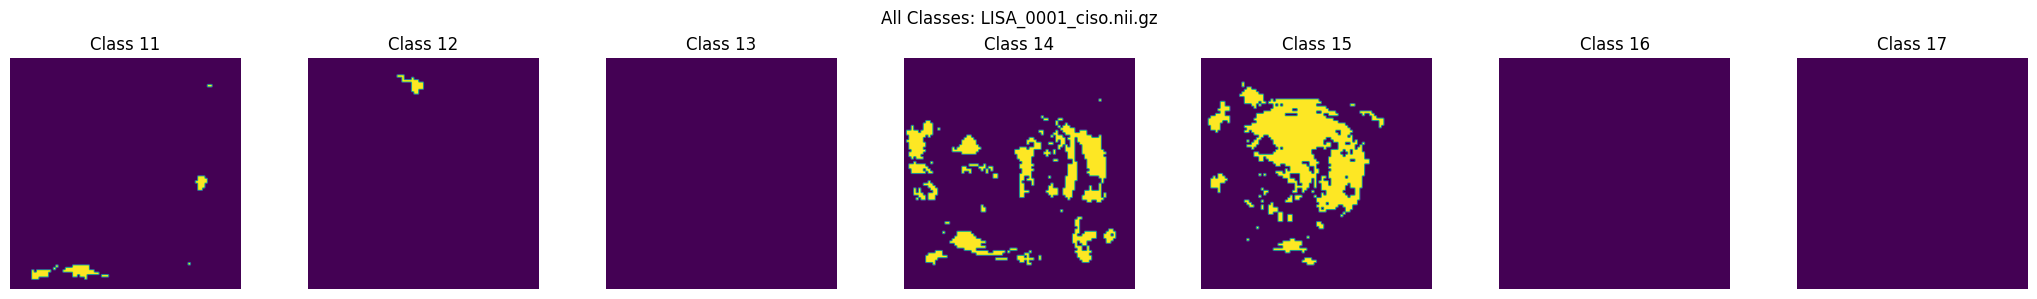

/tmp/ipykernel_1829199/2480504480.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base_cmap = plt.cm.get_cmap("gist_ncar", max_classes)


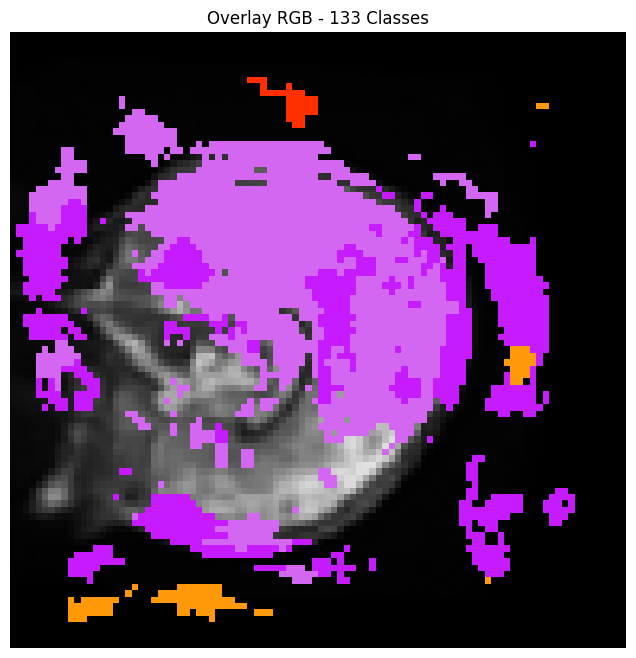

In [42]:
print("✅ Loaded UNesT model from 'wholeBrainSeg_Large_UNEST_segmentation' with 29 output classes")

import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.colors import ListedColormap
import torch
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download
from monai.inferers import sliding_window_inference
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, Orientationd,
    ScaleIntensityd, Resized, ToTensord
)

from monai.networks.nets import SwinUNETR
import torch
from huggingface_hub import hf_hub_download


from monai.transforms import MapTransform
import numpy as np


def plot_all_classes_overlay_rgb(image_tensor, mask_tensor, title="Segmentation Overlay RGB",min_classes=0, max_classes=133, save_path=None):
    img_np = image_tensor.squeeze().cpu().numpy()
    pred_np = torch.argmax(mask_tensor, dim=1).squeeze().cpu().numpy()
    mid_slice = img_np.shape[0] // 2
    image_slice = img_np[mid_slice]  # axial

    # Normalize image and convert to RGB
    image_norm = (image_slice - image_slice.min()) / (image_slice.ptp() + 1e-8)
    image_rgb = np.stack([image_norm]*3, axis=-1)

    # Generate a distinct color for each class (using tab20 + interpolation)
    base_cmap = plt.cm.get_cmap("gist_ncar", max_classes)
    colors = base_cmap(np.arange(max_classes))
    class_mask_rgb = np.zeros_like(image_rgb)

    blended = image_rgb
    # Paint each class mask in RGB
    for i in range(min_classes,max_classes):
        mask = (pred_np[mid_slice] == i)
        if np.any(mask):
            #class_mask_rgb[mask] = colors[i][:3]  # ignore alpha
            blended[mask] = colors[i][:3]
    # Alpha blend
    alpha = 0.5
    #blended = (1 - alpha) * image_rgb + alpha * class_mask_rgb

    # Plot
    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.title(title)
    plt.axis("off")

    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches='tight')
    else:
        plt.show()
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_all_classes(image_tensor, mask_tensor, title="Full Segmentation", min_classes=0,max_classes=133, save_path=None):
    img_np = image_tensor.squeeze().cpu().numpy()
    pred_np = torch.argmax(mask_tensor, dim=1).squeeze().cpu().numpy()

    mid = [s // 2 for s in img_np.shape]  # Cortes en el centro

    # Creamos un grid de subplots
    cols = 7
    rows = int(np.ceil((max_classes-min_classes) / cols))
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    idx = 0
    for i in range(min_classes,max_classes):
        ax = axs.flat[idx]
        idx+=1
        class_mask = (pred_np == i).astype(np.uint8)

        # Mostrar solo si hay al menos un píxel
        if np.sum(class_mask) > 0:
            ax.imshow(class_mask[mid[0], :, :], cmap='viridis')
        else:
            ax.imshow(np.zeros_like(class_mask[mid[0], :, :]), cmap='gray')

        ax.set_title(f"Class {i}")
        ax.axis("off")

    # Si sobran celdas en el grid, las ocultamos
    for j in range(max_classes, len(axs.flat)):
        axs.flat[j].axis("off")

    plt.suptitle(title)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()


# 📂 Segmentar imágenes
image_paths = [
    "/data/cristian/projects/med_data/rise-miccai/task-2/735/155885735/LISA_0001_ciso.nii.gz",
]

# 🔧 Transforms
transforms = Compose([
    LoadImaged(keys=["image"]),
    EnsureChannelFirstd(keys=["image"]),
    Spacingd(keys=["image"], pixdim=(1.5, 1.5, 1.5), mode="bilinear"),
    Orientationd(keys=["image"], axcodes="RAS"),
    ScaleIntensityd(keys=["image"]),
    #RemoveEmptySlicesd(keys=["image"], threshold=0.1),  # 👈 AÑADIDO AQUÍ
    Resized(keys=["image"], spatial_size=(96, 96, 96)),
    ToTensord(keys=["image"])
])

for path in image_paths:
    data = transforms({"image": path})
    image = data["image"].unsqueeze(0).to(device)
    with torch.no_grad():
        mask = sliding_window_inference(image, roi_size=(96, 96, 96), sw_batch_size=1, predictor=model)
    plot_all_classes(image[0], mask,min_classes=11,max_classes=18, title=f"All Classes: {path.split('/')[-1]}")
    #plot_all_classes_overlay(image[0], mask, title="Overlay per Class")
    plot_all_classes_overlay_rgb(image[0],mask,  min_classes=11,max_classes=18, title="Overlay RGB - 133 Classes")

